# Lead Scoring Case Study

## Problem Statement


An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 


The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

### Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime as dt

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pandas as pd

### Importing Data

In [2]:
#Reading the Dataset
leads = pd.read_csv("Leads.csv")

In [3]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Data Inspection

In [4]:
leads.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [5]:
leads.shape

(9240, 37)

In [6]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [7]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
#checking duplicates for Prospect ID
sum(leads.duplicated(subset = 'Prospect ID')) == 0
# No duplicate values

True

In [9]:
#check duplicates for Lead Number
sum(leads.duplicated(subset = 'Lead Number')) == 0
# No duplicate values

True

## Data Cleaning

#### Handling Duplicate Rows

In [10]:
# removing duplicate rows
leads.drop_duplicates(subset='Lead Number')
leads.shape

(9240, 37)

In [11]:
leads.replace("Select",np.NaN, inplace = True)
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


#### Handling Null Values

In [12]:
# Checking for total count and percentage of null values in all columns of the dataframe.

total = pd.DataFrame(leads.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(leads.isnull().sum()/leads.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total, percentage], axis = 1)

,Total,Percentage
How did you hear about X Education,7250,78.46
Lead Profile,6855,74.19
Lead Quality,4767,51.59
Asymmetrique Profile Score,4218,45.65
Asymmetrique Activity Score,4218,45.65
Asymmetrique Profile Index,4218,45.65
Asymmetrique Activity Index,4218,45.65
City,3669,39.71
Specialization,3380,36.58
Tags,3353,36.29


#### Dropping Unnecessary Columns

In [13]:
# Identifying if any column exists with only null values
leads.isnull().all(axis=0).any()


False

In [14]:
# Dropping all columns with only 0 values
leads.loc[:, (leads != 0).any(axis=0)]
leads.shape

(9240, 37)

In [15]:

#Remove columns which has only one unique value

"""
Deleting the following columns as they have only one unique value and hence cannot be responsible in predicting a successful lead case

Magazine
Receive More Updates About Our Courses
Update me on Supply Chain Content
Update me on Supply Chain Content
I agree to pay the amount through cheque

"""   
leads= leads.loc[:,leads.nunique()!=1]
leads.shape

(9240, 32)

In [16]:
# Deleting the columns 'Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Activity Index' & 'Asymmetrique Profile Score' 
# as they will be represented by their corresponding index columns
leads = leads.drop('Asymmetrique Activity Score', axis=1)
leads = leads.drop('Asymmetrique Profile Score', axis=1)
leads = leads.drop('Asymmetrique Profile Index',axis=1)
leads = leads.drop('Asymmetrique Activity Index',axis=1)
leads = leads.drop('Lead Quality', axis=1)
leads.shape

(9240, 27)

In [17]:
leads['Lead Profile'].value_counts(normalize=True)*100
leads.loc[pd.isnull(leads['Lead Profile']), ['Lead Profile']] = 'Potential Lead'
leads['Lead Profile'].value_counts(normalize=True)*100

Potential Lead                 91.645022
Other Leads                     5.270563
Student of SomeSchool           2.608225
Lateral Student                 0.259740
Dual Specialization Student     0.216450
Name: Lead Profile, dtype: float64

In [18]:
# Deleting the columns 'Prospect ID' as it will not have any effect in the predicting model
leads = leads.drop('Prospect ID', axis=1)
#leads = leads.drop('Lead Number', axis=1)
leads.shape

(9240, 26)

In [19]:
# Deleting the columns 'How did you hear about X Education' as it mostly has null values or 'Select' values 
# that contribute to the 'Converted' percentage.
leads = leads.drop('How did you hear about X Education', axis=1)
leads.shape

(9240, 25)

## Dropping the columns which are highly skewed

In [20]:
leads['Country'].value_counts(normalize = True)*100

India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Hong Kong                0.103260
Bahrain                  0.103260
Oman                     0.088509
France                   0.088509
unknown                  0.073757
Germany                  0.059006
Kuwait                   0.059006
Nigeria                  0.059006
Canada                   0.059006
South Africa             0.059006
Sweden                   0.044254
Netherlands              0.029503
Asia/Pacific Region      0.029503
Italy                    0.029503
Bangladesh               0.029503
China                    0.029503
Uganda                   0.029503
Belgium                  0.029503
Philippines              0.029503
Ghana                    0.029503
Russia                   0.014751
Tanzania      

In [21]:
# Dropping the country column since most of the countries are India
leads = leads.drop('Country', axis =1)
leads.shape

(9240, 24)

### Imputing with Median values because the continuous variables have outliers

In [22]:
leads['TotalVisits'].replace(np.NaN, leads['TotalVisits'].median(), inplace =True)

In [23]:
leads['Page Views Per Visit'].replace(np.NaN, leads['Page Views Per Visit'].median(), inplace =True)

### Imputing with Mode values

In [24]:
leads['Specialization'].value_counts(normalize=True)*100

Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.037543
Healthcare Management                 2.713311
Hospitality Management                1.945392
E-COMMERCE                            1.911263
Retail Management                     1.706485
Rural and Agribusiness                1.245734
E-Business                            0.972696
Services Excellence                   0.682594
Name: Specialization, dtype: float64

In [25]:
leads.loc[pd.isnull(leads['Specialization']), ['Specialization']] = 'Finance Management'
leads['Specialization'].value_counts(normalize=True)*100

Finance Management                   47.142857
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

In [26]:
leads['Tags'].value_counts(normalize=True)*100

Will revert after reading the email                  35.196195
Ringing                                              20.434856
Interested in other courses                           8.714116
Already a student                                     7.898760
Closed by Horizzon                                    6.081196
switched off                                          4.076779
Busy                                                  3.159504
Lost to EINS                                          2.972652
Not doing further education                           2.463054
Interested  in full time MBA                          1.987430
Graduation in progress                                1.885510
invalid number                                        1.409886
Diploma holder (Not Eligible)                         1.070155
wrong number given                                    0.798369
opp hangup                                            0.560557
number not provided                                   0

In [27]:
leads = leads[~pd.isnull(leads['Tags'])]
leads.shape

(5887, 24)

In [28]:
leads['City'].value_counts(normalize=True)*100

Mumbai                         57.823129
Thane & Outskirts              13.969874
Other Cities                   12.172012
Other Cities of Maharashtra     7.993197
Other Metro Cities              6.729835
Tier II Cities                  1.311953
Name: City, dtype: float64

In [29]:
leads.loc[pd.isnull(leads['City']), ['City']] = 'Mumbai'

In [30]:
#checking the skewness if any
leads['City'].value_counts(normalize=True)*100

Mumbai                         70.511296
Thane & Outskirts               9.767284
Other Cities                    8.510277
Other Cities of Maharashtra     5.588585
Other Metro Cities              4.705283
Tier II Cities                  0.917275
Name: City, dtype: float64

In [31]:
# Hence dropping the city as its highly skewed
leads = leads.drop('City',axis=1)
leads.shape

(5887, 23)

In [32]:
leads['What matters most to you in choosing a course'].value_counts(normalize=True)*100

Better Career Prospects      99.948329
Flexibility & Convenience     0.034447
Other                         0.017224
Name: What matters most to you in choosing a course, dtype: float64

In [33]:
#Since the above column is highly skewed drooping it
leads = leads.drop('What matters most to you in choosing a course',axis=1)
leads.shape

(5887, 22)

In [34]:
leads['What is your current occupation'].value_counts(normalize=True)*100

Unemployed              84.085429
Working Professional    11.970375
Student                  3.393042
Other                    0.275577
Housewife                0.172236
Businessman              0.103341
Name: What is your current occupation, dtype: float64

In [35]:
# Since this is also highly skewed dropping it
leads = leads.drop('What is your current occupation', axis=1)
leads.shape

(5887, 21)

In [36]:
leads['Last Activity'].value_counts(normalize=True)*100

Email Opened                    38.408424
SMS Sent                        33.143449
Page Visited on Website          7.077507
Olark Chat Conversation          6.490592
Converted to Lead                4.988780
Email Link Clicked               2.900052
Email Bounced                    2.848265
Form Submitted on Website        1.363715
Unreachable                      1.260142
Unsubscribed                     0.725013
Had a Phone Conversation         0.483342
Approached upfront               0.155360
View in browser link Clicked     0.051787
Email Received                   0.034524
Email Marked Spam                0.034524
Visited Booth in Tradeshow       0.017262
Resubscribed to emails           0.017262
Name: Last Activity, dtype: float64

In [37]:
#dropping the null values rows
leads = leads[~pd.isnull(leads['Last Activity'])]
leads.shape

(5793, 21)

In [38]:
leads['Lead Source'].value_counts(normalize=True)*100

Google               32.206622
Direct Traffic       31.599931
Organic Search       13.936557
Olark Chat           11.873808
Reference             7.886982
Referral Sites        1.282718
Welingak Website      0.572023
Facebook              0.416017
Click2call            0.052002
Social Media          0.034668
bing                  0.034668
Live Chat             0.034668
WeLearn               0.017334
Press_Release         0.017334
Pay per Click Ads     0.017334
testone               0.017334
Name: Lead Source, dtype: float64

In [39]:
#dropping the null values rows
leads = leads[~pd.isnull(leads['Lead Source'])]
leads.shape

(5769, 21)

## Reinspecting Null Values

In [40]:
# Checking for total count and percentage of null values in all columns of the dataframe.
round(100* leads.isnull().sum()/len(leads),2)

Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
Search                                    0.0
Newspaper Article                         0.0
X Education Forums                        0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
Tags                                      0.0
Lead Profile                              0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

## Percentage of retained rows

In [41]:
round(100*len(leads)/9240,2)

62.44

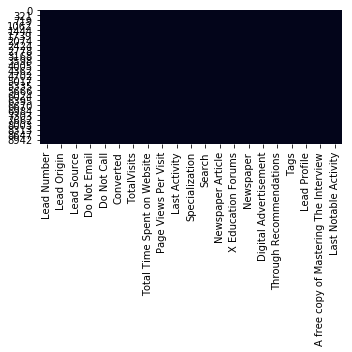

In [42]:
plt.figure(figsize=(5,5))
sns.heatmap(leads.isnull(), cbar=False)

plt.tight_layout()
plt.show()

## Checking for Outliers

In [43]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
leads.describe(percentiles=[.25,.5,.75,.90,.95,.99]).T

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
Lead Number,5769.0,616211.399723,23619.790784,579533.0,595322.00,613506.0,637187.0,649947.8,655516.0,659810.16,660737.0
Converted,5769.0,0.456232,0.498124,0.0,0.00,0.0,1.0,1.0,1.0,1.00,1.0
TotalVisits,5769.0,3.724562,4.897977,0.0,2.00,3.0,5.0,8.0,10.0,17.32,251.0
Total Time Spent on Website,5769.0,547.531981,564.336766,0.0,58.00,302.0,1032.0,1438.2,1599.0,1851.00,2272.0
Page Views Per Visit,5769.0,2.577036,2.058382,0.0,1.25,2.0,4.0,5.0,6.0,9.00,16.0


In [44]:
numeric_variables = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
print(numeric_variables)

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']


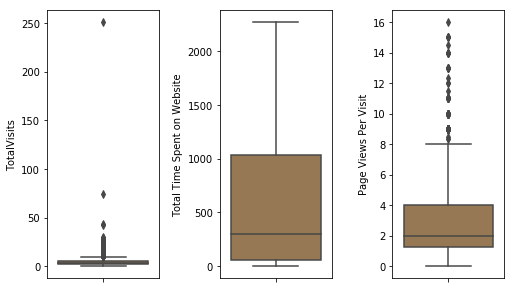

In [45]:
numeric_variables = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

#Function to plot the distribution plot of the numeric variable list
def boxplot(var_list):
    plt.figure(figsize=(12,8))
    for var in var_list:
        plt.subplot(2,5,var_list.index(var)+1)
        #plt.boxplot(country[var])
        sns.boxplot(y=var,palette='cubehelix', data=leads)
    # Automatically adjust subplot params so that the subplotS fits in to the figure area.
    plt.tight_layout()
    # display the plot
    plt.show()
    
boxplot(numeric_variables)

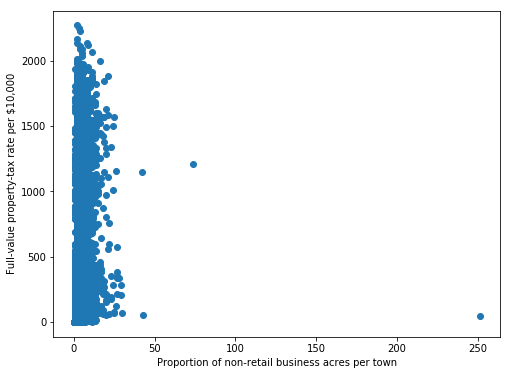

In [46]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(leads['TotalVisits'], leads['Total Time Spent on Website'])
ax.set_xlabel('Proportion of non-retail business acres per town')
ax.set_ylabel('Full-value property-tax rate per $10,000')
plt.show()

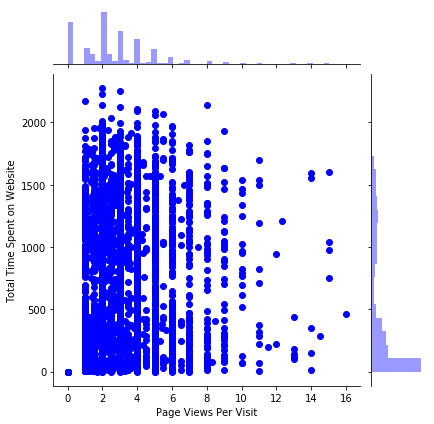

In [47]:
sns.jointplot(leads['Page Views Per Visit'],leads['Total Time Spent on Website'], color="b")
plt.show()

### Removing outlier values based on the Interquartile distance for some of the continuous variable

In [48]:
Q1 = leads['TotalVisits'].quantile(0.25)
Q3 = leads['TotalVisits'].quantile(0.75)
IQR = Q3 - Q1
leads=leads.loc[(leads['TotalVisits'] >= Q1 - 1.5*IQR) & (leads['TotalVisits'] <= Q3 + 1.4*IQR)]

Q1 = leads['Page Views Per Visit'].quantile(0.25)
Q3 = leads['Page Views Per Visit'].quantile(0.75)
IQR = Q3 - Q1
leads=leads.loc[(leads['Page Views Per Visit'] >= Q1 - 1.5*IQR) & (leads['Page Views Per Visit'] <= Q3 + 1.5*IQR)]

leads.shape

(5357, 21)

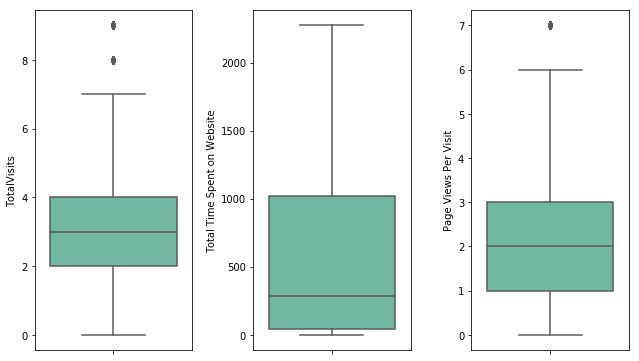

In [49]:
#Function to plot the distribution plot of the numeric variable list
def boxplot(var_list):
    plt.figure(figsize=(15,10))
    for var in var_list:
        plt.subplot(2,5,var_list.index(var)+1)
        #plt.boxplot(country[var])
        sns.boxplot(y=var,palette='BuGn_r', data=leads)
    # Automatically adjust subplot params so that the subplotS fits in to the figure area.
    plt.tight_layout()
    # display the plot
    plt.show()
    
boxplot(numeric_variables) 

In [50]:
leads.shape

(5357, 21)

### Converting some binary variables (Yes/No) to 0/1

In [51]:
# List of variables to map

varlist =  ['Search','Do Not Email', 'Do Not Call', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads[varlist] = leads[varlist].apply(binary_map)
leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Profile,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,0,0,0,0,Interested in other courses,Potential Lead,0,Modified
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,Ringing,Potential Lead,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,Will revert after reading the email,Potential Lead,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,0,0,0,0,Ringing,Potential Lead,0,Modified
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,0,0,0,0,Will revert after reading the email,Potential Lead,0,Modified


In [52]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(leads[['Lead Origin','Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
leads = pd.concat([leads, dummy1], axis=1)
leads.shape

(5357, 38)

In [53]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy2 = pd.get_dummies(leads['Lead Source'], drop_first=True)

# Adding the results to the master dataframe
leads = pd.concat([leads, dummy2], axis=1)
leads.shape

(5357, 53)

In [54]:
# Creating dummy variables for the remaining categorical variables and 
# dropping the level called 'Unknown' which represents null/select values.

# Creating dummy variables for the variable 'Specialization'
ml = pd.get_dummies(leads['Specialization'], prefix='Specialization')
#Adding the results to the master dataframe
leads = pd.concat([leads,ml], axis=1)
#--------------------------------------------------------------------------------------
# Creating dummy variables for the variable 'Last Activity'
ml = pd.get_dummies(leads['Last Activity'], prefix='Last Activity')
# Dropping the level called 'Unknown' which represents null/select values
#Adding the results to the master dataframe
leads = pd.concat([leads,ml], axis=1)
#--------------------------------------------------------------------------------------
# Creating a dummy variables for the variable 'Lead Profile'
ml = pd.get_dummies(leads['Lead Profile'],prefix='Lead Profile',drop_first=True)
#Adding the results to the master dataframe
leads = pd.concat([leads,ml],axis=1)
#---------------------------------------------------------------------------------------
ml = pd.get_dummies(leads['Tags'],prefix='Tags',drop_first=True)
#Adding the results to the master dataframe
leads = pd.concat([leads,ml],axis=1) 
leads.shape

(5357, 117)

### Dropping the repeated variables

In [55]:
# We have created dummies for the below variables, so we can drop them
leads = leads.drop(['Lead Origin', 'Specialization','Last Activity', 
                    'Lead Source','Lead Profile','Tags','Last Notable Activity'], 1)
leads.shape

(5357, 110)

In [56]:
leads.head()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,...,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given
0,660737,0,0,0,0.0,0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,660728,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,660727,0,0,1,2.0,1532,2.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,660719,0,0,0,1.0,305,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,660681,0,0,1,2.0,1428,1.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [57]:
# Ensuring there are no categorical columns left in the dataframe
cols = leads.columns
num_cols = leads._get_numeric_data().columns
list(set(cols) - set(num_cols))

[]

In [58]:
# Creating a copy of this origial variable in case if needed later on
original_leads = leads.copy()
print(original_leads.shape)
print(leads.shape)

(5357, 110)
(5357, 110)


## Test-Train Split

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
# Putting feature variable to X
X = leads.drop(['Converted','Lead Number'], axis=1)

X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [61]:
# Putting response variable to y
y = leads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [62]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given
5594,0,0,-1.331813,-0.945571,-1.366798,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8073,0,0,-1.331813,-0.945571,-1.366798,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7706,0,0,1.777686,0.891178,0.005177,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8857,0,0,0.889258,-0.789214,1.577354,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5329,0,0,1.777686,0.321463,2.755014,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
X_train.describe()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given
count,3749.000000,3749.000000,3.749000e+03,3.749000e+03,3.749000e+03,3749.000000,3749.0,3749.0,3749.0,3749.000000,...,3749.000000,3749.000000,3749.00000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000
mean,0.063217,0.000533,-2.501185e-16,9.079605e-17,3.633619e-17,0.000533,0.0,0.0,0.0,0.000267,...,0.001334,0.000267,0.00080,0.349960,0.001867,0.014671,0.005068,0.005335,0.043478,0.007202
std,0.243385,0.023094,1.000133e+00,1.000133e+00,1.000133e+00,0.023094,0.0,0.0,0.0,0.016332,...,0.036500,0.016332,0.02828,0.477021,0.043176,0.120246,0.071019,0.072854,0.203958,0.084569
min,0.000000,0.000000,-1.331813e+00,-9.455712e-01,-1.366798e+00,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,-4.433848e-01,-8.682911e-01,-7.779674e-01,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,8.294211e-04,-4.387577e-01,-1.891372e-01,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,4.450437e-01,8.660174e-01,3.996931e-01,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,2.666115e+00,3.103545e+00,2.755014e+00,1.000000,0.0,0.0,0.0,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Checking the Lead Conversion Rate

In [66]:
### Checking the Lead Conversion Rate
converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
converted

45.11853649430652

We have almost 45% lead conversion rate

## Model Building
Let's start by splitting our data into a training set and a test set.

In [67]:
import statsmodels.api as sm

In [68]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3749
Model:                            GLM   Df Residuals:                     3653
Model Family:                Binomial   Df Model:                           95
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 30 May 2020   Deviance:                          nan
Time:                        00:56:21   Pearson chi2:                 6.89e+17
No. Iterations:                   100   Covariance Type:             nonrobust
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                   9.774e+14   6.83e+07   1.43e+07      0.000    9.77e+14    9.77e+14
Do Not Email                                           -1.325e+14   6.43e+06  -2.06e+07      0.000   -1.33e+14   -1.33e+14
Do Not Call                                             4.066e+15   4.79e+07   8.49e+07      0.000    4.07e+15    4.07e+15
TotalVisits                                             2.687e+13   1.92e+06    1.4e+07      0.000    2.69e+13    2.69e+13
Total Time Spent on Website                            -9.876e+13   1.36e+06  -7.25e+07      0.000   -9.88e+13   -9.88e+13
Page Views Per Visit                                   -2.274e+13   1.94e+06  -1.17e+07      0.000   -2.27e+13   -2.27e+13
Search                                                 -5.787e+15   5.22e+07  -1.11e+08      0.000   -5.79e+15   -5.79e+15
Newspaper Article                                        -44.1800   6.39e-07  -6.92e+07      0.000     -44.180     -44.180
X Education Forums                                       -32.8298   4.57e-07  -7.18e+07      0.000     -32.830     -32.830
Newspaper                                                 40.2166   2.86e-07    1.4e+08      0.000      40.217      40.217
Digital Advertisement                                   4.281e+15   6.75e+07   6.34e+07      0.000    4.28e+15    4.28e+15
Through Recommendations                                 3.094e+15   4.28e+07   7.24e+07      0.000    3.09e+15    3.09e+15
A free copy of Mastering The Interview                 -4.688e+13   3.43e+06  -1.37e+07      0.000   -4.69e+13   -4.69e+13
Lead Origin_Landing Page Submission                     -2.78e+12   3.83e+06  -7.26e+05      0.000   -2.78e+12   -2.78e+12
Lead Origin_Lead Add Form                               2.661e+15   6.78e+07   3.92e+07      0.000    2.66e+15    2.66e+15
Lead Origin_Lead Import                                 1.398e+15   4.04e+07   3.46e+07      0.000     1.4e+15     1.4e+15
Last Notable Activity_Email Bounced                    -6.726e+14   1.97e+07  -3.42e+07      0.000   -6.73e+14   -6.73e+14
Last Notable Activity_Email Link Clicked               -3.245e+14   1.75e+07  -1.86e+07      0.000   -3.25e+14   -3.25e+14
Last Notable Activity_Email Marked Spam                   14.6364   1.39e-07   1.05e+08      0.000      14.636      14.636
Last Notable Activity_Email Opened                     -2.875e+14   1.37e+07  -2.09e+07      0.000   -2.87e+14   -2.87e+14
Last Notable Activity_Email Received                    -7.48e+14   8.81e+07  -8.49e+06      0.000   -7.48e+14   -7.48e+14
Last Notable Activity_Had a Phone Conversation          4.992e+15    3.7e+07   1.35e+08      0.000    4.99e+15    4.99e+15
Last Notable Activity_Modified                         -4.047e+14   1.31e+07   -3.1e+07

## Feature Selection Using RFE

In [69]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [70]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [71]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False,  True, False, False, False, False,  True, False,
       False,  True,  True,  True, False, False, False,  True,  True,
        True,  True,  True, False,  True, False,  True, False, False,
       False, False,  True, False,  True,  True, False,  True,  True])

In [72]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 4),
 ('Do Not Call', False, 69),
 ('TotalVisits', False, 26),
 ('Total Time Spent on Website', False, 2),
 ('Page Views Per Visit', False, 27),
 ('Search', False, 68),
 ('Newspaper Article', False, 82),
 ('X Education Forums', False, 81),
 ('Newspaper', False, 83),
 ('Digital Advertisement', False, 70),
 ('Through Recommendations', False, 43),
 ('A free copy of Mastering The Interview', False, 44),
 ('Lead Origin_Landing Page Submission', False, 17),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 59),
 ('Last Notable Activity_Email Bounced', False, 72),
 ('Last Notable Activity_Email Link Clicked', False, 37),
 ('Last Notable Activity_Email Marked Spam', False, 84),
 ('Last Notable Activity_Email Opened', False, 60),
 ('Last Notable Activity_Email Received', False, 74),
 ('Last Notable Activity_Had a Phone Conversation', False, 23),
 ('Last Notable Activity_Modified', True, 1),
 ('Last Notable Activity_Olark Chat Conversation', Fal

In [73]:
col = X_train.columns[rfe.support_]
col

Index(['Lead Origin_Lead Add Form', 'Last Notable Activity_Modified',
       'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent',
       'Lead Profile_Lateral Student', 'Lead Profile_Student of SomeSchool',
       'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Interested  in full time MBA', 'Tags_Interested in Next batch',
       'Tags_Interested in other courses', 'Tags_Lateral student',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_number not provided', 'Tags_switched off',
       'Tags_wrong number given'],
      dtype='object')

In [74]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Marked Spam',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Email Received',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser

In [75]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3749
Model:                            GLM   Df Residuals:                     3728
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -437.02
Date:                Sat, 30 May 2020   Deviance:                       874.04
Time:                        00:56:24   Pearson chi2:                 5.31e+03
No. Iterations:                    24   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.0484      0.312     -9.768      0.000      -3.660      -2.437
Lead Origin_Lead Add Form                   -0.1248      0.428     -0.292      0.771      -0.963       0.714
Last Notable Activity_Modified              -1.1373      0.233     -4.874      0.000      -1.595      -0.680
Last Activity_Had a Phone Conversation      -1.6335      0.841     -1.941      0.052      -3.283       0.016
Last Activity_SMS Sent                       1.3458      0.228      5.898      0.000       0.899       1.793
Lead Profile_Lateral Student                25.9149   5.56e+04      0.000      1.000   -1.09e+05    1.09e+05
Lead Profile_Student of SomeSchool          -2.5913      0.973     -2.663      0.008      -4.498      -0.684
Tags_Busy                                    2.6064      0.371      7.027      0.000       1.879       3.333
Tags_Closed by Horizzon                      9.0897      1.083      8.392      0.000       6.967      11.213
Tags_Interested  in full time MBA           -0.7267      1.053     -0.690      0.490      -2.791       1.338
Tags_Interested in Next batch               27.3010   1.08e+05      0.000      1.000   -2.12e+05    2.12e+05
Tags_Interested in other courses            -0.0535      0.472     -0.113      0.910      -0.978       0.871
Tags_Lateral student                        28.1440   1.23e+05      0.000      1.000   -2.42e+05    2.42e+05
Tags_Lost to EINS                            7.5603      0.705     10.718      0.000       6.178       8.943
Tags_Not doing further education           -22.0566   2.19e+04     -0.001      0.999   -4.29e+04    4.28e+04
Tags_Ringing                                -1.0740      0.389     -2.763      0.006      -1.836      -0.312
Tags_Will revert after reading the email     6.4857      0.351     18.470      0.000       5.797       7.174
Tags_invalid number                         -1.5512      1.066     -1.455      0.146      -3.641       0.539
Tags_number not provided                   -22.9032   4.68e+04     -0.000      1.000   -9.18e+04    9.17e+04
Tags_switched off                           -2.7156      1.057     -2.569      0.010      -4.787      -0.644
Tags_wrong number given                    -23.3221   4.01e+04     -0.001      1.000   -7.87e+04    7.86e+04
============================================================================================================
"""

In [76]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5594    0.015947
8073    0.990607
7706    0.991699
8857    0.003129
5329    0.058601
2099    0.007301
9044    0.968849
4270    0.005170
7342    0.992638
2967    0.974563
dtype: float64

In [77]:
# reshaping the numpy array containing predicted values
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.01594697, 0.99060672, 0.99169925, 0.00312862, 0.05860136,
       0.00730107, 0.9688493 , 0.00516996, 0.99263796, 0.97456285])

In [78]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,0,0.015947,5594
1,1,0.990607,8073
2,1,0.991699,7706
3,0,0.003129,8857
4,0,0.058601,5329


#### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [79]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,0,0.015947,5594,0
1,1,0.990607,8073,1
2,1,0.991699,7706,1
3,0,0.003129,8857,0
4,0,0.058601,5329,0


In [80]:
from sklearn import metrics

In [81]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[2006   65]
 [  73 1605]]


In [100]:
# Predicted     Cold_lead    hot_lead
# Actual
# Cold_lead        2006      65
# hot_lead         73       1605  

In [83]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9631901840490797


#### Checking VIFs

In [84]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [85]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Tags_Closed by Horizzon,1.31
6,Tags_Busy,1.08
12,Tags_Lost to EINS,1.07
5,Lead Profile_Student of SomeSchool,1.06
18,Tags_switched off,1.06
13,Tags_Not doing further education,1.06
8,Tags_Interested in full time MBA,1.03
19,Tags_wrong number given,1.02
16,Tags_invalid number,1.02
2,Last Activity_Had a Phone Conversation,1.02


#### Clearly there is not much multicollinearity present in our model among the selected features as per their VIF values.

#### Let us now check the correlation among the features in the below heat map.

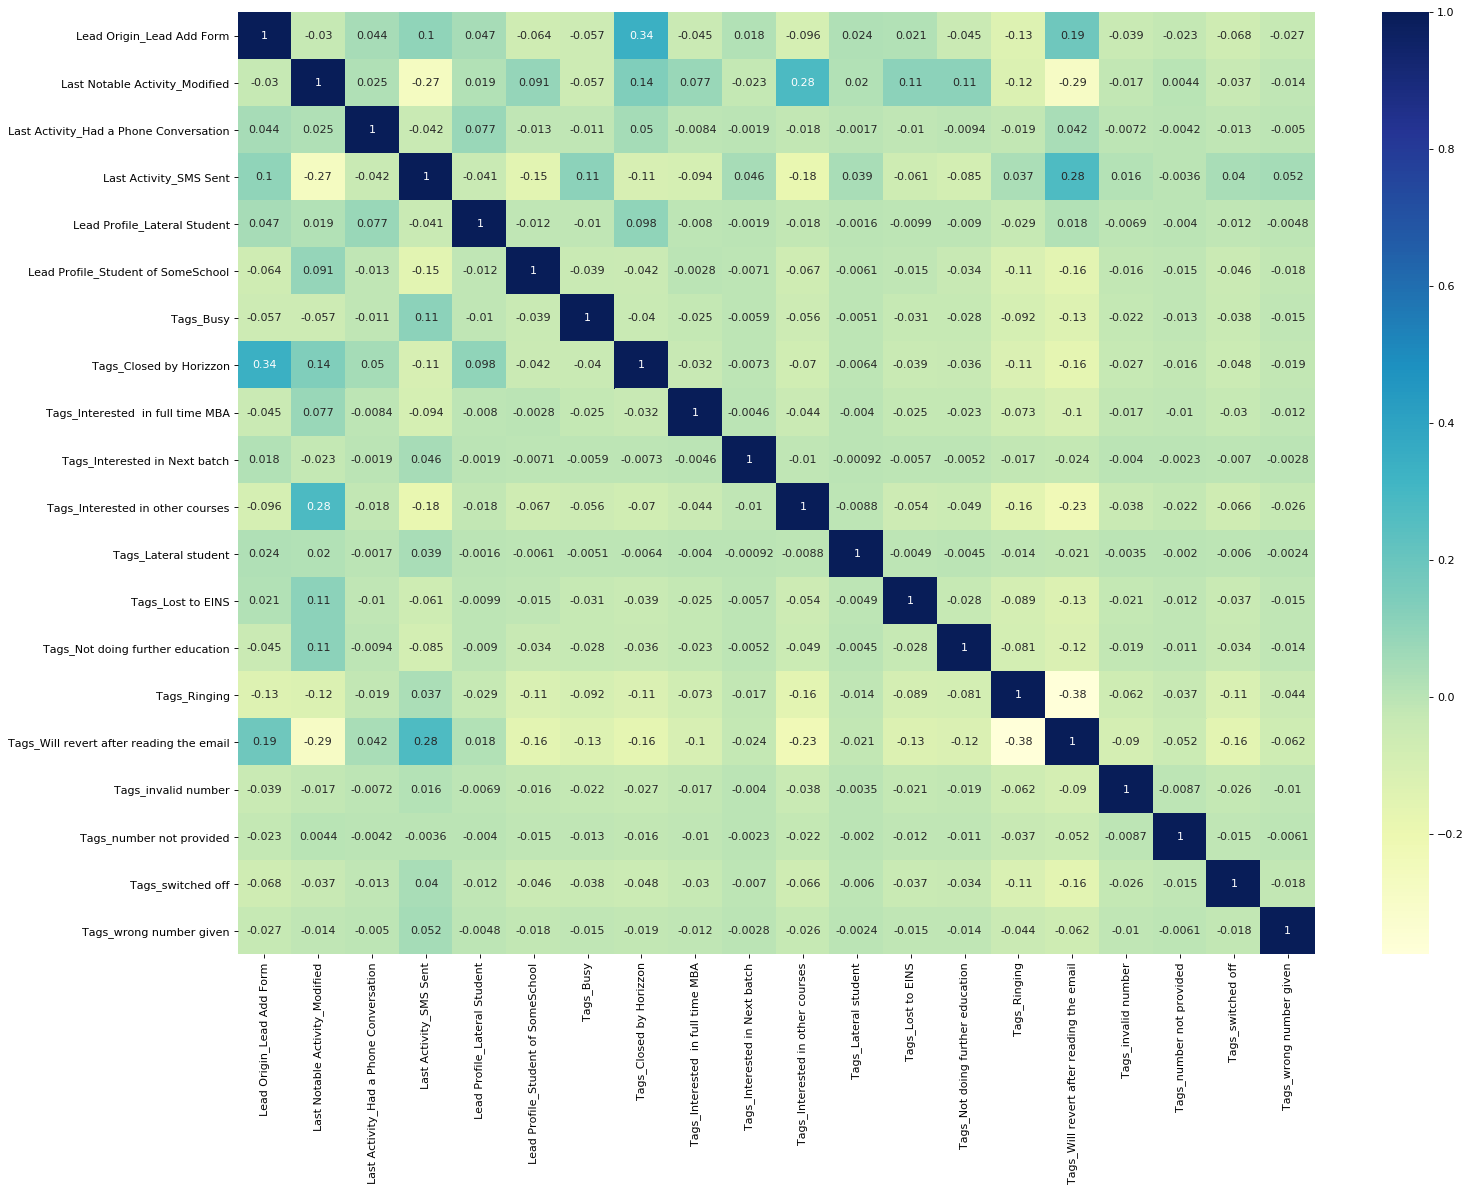

In [86]:
# Slightly alter the figure size to make it more horizontal.
plt.figure(figsize=(20,15), dpi=80, facecolor='w', edgecolor='k', frameon='True')

cor = X_train[col].corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu")

plt.tight_layout()
plt.show()

#### Dropping the Variable and Updating the Model

As you can notice some of the variable have high VIF values as well as high p-values. Such variables are insignificant and should be dropped.

In [87]:
col = col.drop('Lead Profile_Lateral Student', 1)

col

Index(['Lead Origin_Lead Add Form', 'Last Notable Activity_Modified',
       'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent',
       'Lead Profile_Student of SomeSchool', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested  in full time MBA',
       'Tags_Interested in Next batch', 'Tags_Interested in other courses',
       'Tags_Lateral student', 'Tags_Lost to EINS',
       'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_number not provided', 'Tags_switched off',
       'Tags_wrong number given'],
      dtype='object')

In [88]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3749
Model:                            GLM   Df Residuals:                     3729
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -440.40
Date:                Sat, 30 May 2020   Deviance:                       880.79
Time:                        00:56:27   Pearson chi2:                 5.44e+03
No. Iterations:                    24   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.9583      0.301     -9.830      0.000      -3.548      -2.368
Lead Origin_Lead Add Form                   -0.1231      0.428     -0.287      0.774      -0.962       0.716
Last Notable Activity_Modified              -1.1533      0.232     -4.965      0.000      -1.609      -0.698
Last Activity_Had a Phone Conversation      -1.6193      0.839     -1.929      0.054      -3.265       0.026
Last Activity_SMS Sent                       1.3312      0.227      5.857      0.000       0.886       1.777
Lead Profile_Student of SomeSchool          -2.6233      0.964     -2.721      0.007      -4.513      -0.734
Tags_Busy                                    2.5282      0.362      6.981      0.000       1.818       3.238
Tags_Closed by Horizzon                      9.0827      1.083      8.384      0.000       6.959      11.206
Tags_Interested  in full time MBA           -0.8104      1.050     -0.772      0.440      -2.869       1.248
Tags_Interested in Next batch               27.2251   1.08e+05      0.000      1.000   -2.12e+05    2.12e+05
Tags_Interested in other courses            -0.1325      0.465     -0.285      0.775      -1.043       0.778
Tags_Lateral student                        28.0809   1.23e+05      0.000      1.000   -2.41e+05    2.41e+05
Tags_Lost to EINS                            7.4903      0.702     10.670      0.000       6.114       8.866
Tags_Not doing further education           -22.1360   2.18e+04     -0.001      0.999   -4.28e+04    4.28e+04
Tags_Ringing                                -1.1528      0.380     -3.032      0.002      -1.898      -0.408
Tags_Will revert after reading the email     6.4115      0.342     18.760      0.000       5.742       7.081
Tags_invalid number                         -1.6291      1.063     -1.532      0.125      -3.713       0.455
Tags_number not provided                   -22.9814   4.68e+04     -0.000      1.000   -9.18e+04    9.17e+04
Tags_switched off                           -2.7934      1.054     -2.650      0.008      -4.859      -0.728
Tags_wrong number given                    -23.3979   4.01e+04     -0.001      1.000   -7.87e+04    7.86e+04
============================================================================================================
"""

In [89]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5594    0.016125
8073    0.990634
7706    0.991710
8857    0.003168
5329    0.058420
2099    0.007232
9044    0.969326
4270    0.005146
7342    0.993112
2967    0.974195
dtype: float64

In [90]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.0161255 , 0.99063445, 0.99171003, 0.00316751, 0.05841981,
       0.0072321 , 0.96932618, 0.00514577, 0.99311234, 0.97419541])

In [91]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,0,0.016125,5594
1,1,0.990634,8073
2,1,0.991710,7706
3,0,0.003168,8857
4,0,0.058420,5329


#### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [92]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,0,0.016125,5594,0
1,1,0.990634,8073,1
2,1,0.991710,7706,1
3,0,0.003168,8857,0
4,0,0.058420,5329,0


In [93]:
from sklearn import metrics

In [94]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[2006   65]
 [  74 1604]]


In [95]:
# Predicted     not_churn    churn
# Actual
# not_churn        2006      65
# churn            74       1604

In [96]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.962923446252334


#### Checking VIFs

In [97]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [98]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Tags_Closed by Horizzon,1.30
5,Tags_Busy,1.08
11,Tags_Lost to EINS,1.07
4,Lead Profile_Student of SomeSchool,1.06
17,Tags_switched off,1.06
12,Tags_Not doing further education,1.06
7,Tags_Interested in full time MBA,1.03
18,Tags_wrong number given,1.02
15,Tags_invalid number,1.02
2,Last Activity_Had a Phone Conversation,1.01


#### Dropping the Variable and Updating the Model

As you can notice some of the variable have high VIF values as well as high p-values. Such variables are insignificant and should be dropped.

In [101]:
col = col.drop('Tags_number not provided', 1)
col

Index(['Lead Origin_Lead Add Form', 'Last Notable Activity_Modified',
       'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent',
       'Lead Profile_Student of SomeSchool', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested  in full time MBA',
       'Tags_Interested in Next batch', 'Tags_Interested in other courses',
       'Tags_Lateral student', 'Tags_Lost to EINS',
       'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Tags_wrong number given'],
      dtype='object')

In [102]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3749
Model:                            GLM   Df Residuals:                     3730
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -441.80
Date:                Sat, 30 May 2020   Deviance:                       883.61
Time:                        01:08:56   Pearson chi2:                 5.33e+03
No. Iterations:                    23   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.0637      0.302    -10.161      0.000      -3.655      -2.473
Lead Origin_Lead Add Form                   -0.1176      0.428     -0.275      0.784      -0.957       0.721
Last Notable Activity_Modified              -1.1394      0.233     -4.895      0.000      -1.596      -0.683
Last Activity_Had a Phone Conversation      -1.6273      0.839     -1.940      0.052      -3.271       0.016
Last Activity_SMS Sent                       1.3012      0.225      5.784      0.000       0.860       1.742
Lead Profile_Student of SomeSchool          -2.5925      0.976     -2.656      0.008      -4.506      -0.679
Tags_Busy                                    2.6500      0.359      7.381      0.000       1.946       3.354
Tags_Closed by Horizzon                      9.1748      1.084      8.464      0.000       7.050      11.299
Tags_Interested  in full time MBA           -0.7083      1.050     -0.674      0.500      -2.767       1.351
Tags_Interested in Next batch               26.3591   6.55e+04      0.000      1.000   -1.28e+05    1.28e+05
Tags_Interested in other courses            -0.0292      0.465     -0.063      0.950      -0.941       0.883
Tags_Lateral student                        27.2040   7.47e+04      0.000      1.000   -1.46e+05    1.47e+05
Tags_Lost to EINS                            7.5798      0.702     10.790      0.000       6.203       8.957
Tags_Not doing further education           -21.0311   1.33e+04     -0.002      0.999    -2.6e+04     2.6e+04
Tags_Ringing                                -1.0272      0.376     -2.731      0.006      -1.765      -0.290
Tags_Will revert after reading the email     6.5166      0.342     19.048      0.000       5.846       7.187
Tags_invalid number                         -1.5018      1.061     -1.415      0.157      -3.582       0.579
Tags_switched off                           -2.6654      1.052     -2.533      0.011      -4.728      -0.603
Tags_wrong number given                    -22.2688   2.44e+04     -0.001      0.999   -4.78e+04    4.77e+04
============================================================================================================
"""

In [103]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5594    0.016448
8073    0.990401
7706    0.991457
8857    0.003240
5329    0.057878
2099    0.007308
9044    0.969317
4270    0.005323
7342    0.993116
2967    0.973780
dtype: float64

In [104]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5594    0.016448
8073    0.990401
7706    0.991457
8857    0.003240
5329    0.057878
2099    0.007308
9044    0.969317
4270    0.005323
7342    0.993116
2967    0.973780
dtype: float64

#### Creating a dataframe with the actual churn flag and the predicted probabilities

In [105]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
5594,0,0.016448,5594
8073,1,0.990401,8073
7706,1,0.991457,7706
8857,0,0.003240,8857
5329,0,0.057878,5329


In [106]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
5594,0,0.016448,5594,0
8073,1,0.990401,8073,1
7706,1,0.991457,7706,1
8857,0,0.003240,8857,0
5329,0,0.057878,5329,0


In [107]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[2006   65]
 [  74 1604]]


In [108]:
# Predicted     not_churn    churn
# Actual
# not_churn        2006      65
# churn            74       1604  

In [109]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.962923446252334


#### Checking VIFs

In [110]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [111]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Tags_Closed by Horizzon,1.30
5,Tags_Busy,1.08
11,Tags_Lost to EINS,1.07
4,Lead Profile_Student of SomeSchool,1.06
16,Tags_switched off,1.06
12,Tags_Not doing further education,1.06
7,Tags_Interested in full time MBA,1.03
17,Tags_wrong number given,1.02
15,Tags_invalid number,1.02
2,Last Activity_Had a Phone Conversation,1.01


### Dropping the Variable and Updating the Model

As you can notice some of the variable have high VIF values as well as high p-values. Such variables are insignificant and should be dropped.

In [112]:
col = col.drop('Tags_wrong number given', 1)
col

Index(['Lead Origin_Lead Add Form', 'Last Notable Activity_Modified',
       'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent',
       'Lead Profile_Student of SomeSchool', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested  in full time MBA',
       'Tags_Interested in Next batch', 'Tags_Interested in other courses',
       'Tags_Lateral student', 'Tags_Lost to EINS',
       'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off'],
      dtype='object')

In [113]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3749
Model:                            GLM   Df Residuals:                     3731
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -444.24
Date:                Sat, 30 May 2020   Deviance:                       888.47
Time:                        01:11:25   Pearson chi2:                 5.16e+03
No. Iterations:                    23   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.2379      0.304    -10.648      0.000      -3.834      -2.642
Lead Origin_Lead Add Form                   -0.1072      0.428     -0.251      0.802      -0.946       0.731
Last Notable Activity_Modified              -1.1201      0.234     -4.794      0.000      -1.578      -0.662
Last Activity_Had a Phone Conversation      -1.6434      0.837     -1.962      0.050      -3.285      -0.002
Last Activity_SMS Sent                       1.2394      0.221      5.608      0.000       0.806       1.673
Lead Profile_Student of SomeSchool          -2.5455      0.997     -2.554      0.011      -4.499      -0.592
Tags_Busy                                    2.8594      0.354      8.083      0.000       2.166       3.553
Tags_Closed by Horizzon                      9.3303      1.085      8.596      0.000       7.203      11.458
Tags_Interested  in full time MBA           -0.5378      1.051     -0.512      0.609      -2.598       1.523
Tags_Interested in Next batch               26.5923   6.55e+04      0.000      1.000   -1.28e+05    1.28e+05
Tags_Interested in other courses             0.1452      0.467      0.311      0.756      -0.770       1.060
Tags_Lateral student                        27.4223   7.47e+04      0.000      1.000   -1.46e+05    1.47e+05
Tags_Lost to EINS                            7.7324      0.704     10.987      0.000       6.353       9.112
Tags_Not doing further education           -20.8540   1.33e+04     -0.002      0.999   -2.61e+04     2.6e+04
Tags_Ringing                                -0.8116      0.370     -2.196      0.028      -1.536      -0.087
Tags_Will revert after reading the email     6.6947      0.343     19.504      0.000       6.022       7.367
Tags_invalid number                         -1.2827      1.059     -1.212      0.226      -3.357       0.792
Tags_switched off                           -2.4447      1.049     -2.330      0.020      -4.502      -0.388
============================================================================================================
"""

In [114]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5594    0.017132
8073    0.989939
7706    0.990952
8857    0.003393
5329    0.056778
2099    0.007422
9044    0.969431
4270    0.005655
7342    0.993120
2967    0.972776
dtype: float64

In [115]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.01713176, 0.98993863, 0.99095204, 0.00339294, 0.05677829,
       0.00742227, 0.96943131, 0.00565453, 0.99312028, 0.97277563])

In [116]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,0,0.017132,5594
1,1,0.989939,8073
2,1,0.990952,7706
3,0,0.003393,8857
4,0,0.056778,5329


In [117]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,0,0.017132,5594,0
1,1,0.989939,8073,1
2,1,0.990952,7706,1
3,0,0.003393,8857,0
4,0,0.056778,5329,0


In [118]:
from sklearn import metrics

In [119]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[2006   65]
 [  74 1604]]


In [120]:
# Predicted     not_churn    churn
# Actual
# not_churn        3270      365
# churn            579       708  

In [121]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.962923446252334


#### Checking VIFs

In [122]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [123]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Tags_Closed by Horizzon,1.30
5,Tags_Busy,1.08
11,Tags_Lost to EINS,1.07
16,Tags_switched off,1.06
12,Tags_Not doing further education,1.06
4,Lead Profile_Student of SomeSchool,1.06
7,Tags_Interested in full time MBA,1.03
15,Tags_invalid number,1.02
10,Tags_Lateral student,1.01
8,Tags_Interested in Next batch,1.01


#### Dropping the Variable and Updating the Model

As you can notice some of the variable have high VIF values as well as high p-values. Such variables are insignificant and should be dropped.

In [124]:
col = col.drop('Lead Origin_Lead Add Form', 1)
col

Index(['Last Notable Activity_Modified',
       'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent',
       'Lead Profile_Student of SomeSchool', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested  in full time MBA',
       'Tags_Interested in Next batch', 'Tags_Interested in other courses',
       'Tags_Lateral student', 'Tags_Lost to EINS',
       'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off'],
      dtype='object')

In [125]:
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3749
Model:                            GLM   Df Residuals:                     3732
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -444.27
Date:                Sat, 30 May 2020   Deviance:                       888.53
Time:                        01:12:20   Pearson chi2:                 5.06e+03
No. Iterations:                    23   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.2374      0.304    -10.647      0.000      -3.833      -2.641
Last Notable Activity_Modified              -1.1183      0.233     -4.791      0.000      -1.576      -0.661
Last Activity_Had a Phone Conversation      -1.6634      0.831     -2.002      0.045      -3.292      -0.035
Last Activity_SMS Sent                       1.2359      0.221      5.601      0.000       0.803       1.668
Lead Profile_Student of SomeSchool          -2.5388      0.996     -2.550      0.011      -4.490      -0.587
Tags_Busy                                    2.8608      0.354      8.088      0.000       2.168       3.554
Tags_Closed by Horizzon                      9.2711      1.058      8.763      0.000       7.197      11.345
Tags_Interested  in full time MBA           -0.5388      1.051     -0.512      0.608      -2.599       1.522
Tags_Interested in Next batch               26.5676   6.55e+04      0.000      1.000   -1.28e+05    1.28e+05
Tags_Interested in other courses             0.1438      0.467      0.308      0.758      -0.771       1.059
Tags_Lateral student                        27.4041   7.46e+04      0.000      1.000   -1.46e+05    1.46e+05
Tags_Lost to EINS                            7.7191      0.702     11.001      0.000       6.344       9.094
Tags_Not doing further education           -20.8563   1.33e+04     -0.002      0.999   -2.61e+04     2.6e+04
Tags_Ringing                                -0.8127      0.370     -2.199      0.028      -1.537      -0.088
Tags_Will revert after reading the email     6.6792      0.337     19.810      0.000       6.018       7.340
Tags_invalid number                         -1.2807      1.059     -1.210      0.226      -3.355       0.794
Tags_switched off                           -2.4427      1.049     -2.328      0.020      -4.499      -0.386
============================================================================================================
"""

In [126]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5594    0.017122
8073    0.990785
7706    0.990785
8857    0.003402
5329    0.056562
2099    0.007432
9044    0.968984
4270    0.005661
7342    0.992720
2967    0.972330
dtype: float64

In [127]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.0171223 , 0.99078493, 0.99078493, 0.00340156, 0.05656243,
       0.00743183, 0.96898386, 0.00566129, 0.99271973, 0.9723297 ])

In [128]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,0,0.017122,5594
1,1,0.990785,8073
2,1,0.990785,7706
3,0,0.003402,8857
4,0,0.056562,5329


In [129]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,0,0.017122,5594,0
1,1,0.990785,8073,1
2,1,0.990785,7706,1
3,0,0.003402,8857,0
4,0,0.056562,5329,0


In [130]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[2006   65]
 [  74 1604]]


In [131]:
# Predicted     not_churn    churn
# Actual
# not_churn        3270      365
# churn            579       708  

In [132]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.962923446252334


#### Checking VIFs

In [133]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [134]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Tags_Closed by Horizzon,1.10
4,Tags_Busy,1.07
3,Lead Profile_Student of SomeSchool,1.06
10,Tags_Lost to EINS,1.06
11,Tags_Not doing further education,1.06
15,Tags_switched off,1.06
6,Tags_Interested in full time MBA,1.03
14,Tags_invalid number,1.02
1,Last Activity_Had a Phone Conversation,1.01
7,Tags_Interested in Next batch,1.01


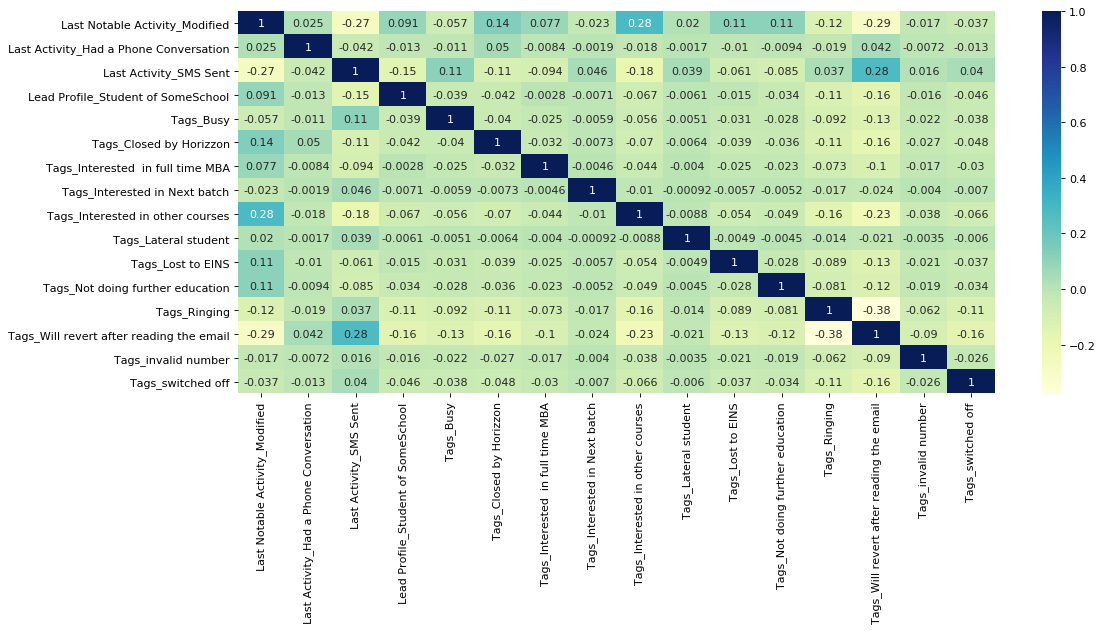

In [135]:
# Slightly alter the figure size to make it more horizontal.
plt.figure(figsize=(15,8), dpi=80, facecolor='w', edgecolor='k', frameon='True')

cor = X_train[col].corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu")

plt.tight_layout()
plt.show()

In [136]:
col = col.drop('Tags_Lateral student', 1)
col

Index(['Last Notable Activity_Modified',
       'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent',
       'Lead Profile_Student of SomeSchool', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested  in full time MBA',
       'Tags_Interested in Next batch', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off'],
      dtype='object')

In [137]:
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3749
Model:                            GLM   Df Residuals:                     3733
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -452.30
Date:                Sat, 30 May 2020   Deviance:                       904.61
Time:                        01:13:50   Pearson chi2:                 5.12e+03
No. Iterations:                    23   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.0816      0.281    -10.959      0.000      -3.633      -2.531
Last Notable Activity_Modified              -1.0502      0.229     -4.577      0.000      -1.500      -0.600
Last Activity_Had a Phone Conversation      -1.6526      0.828     -1.995      0.046      -3.276      -0.029
Last Activity_SMS Sent                       1.3244      0.219      6.044      0.000       0.895       1.754
Lead Profile_Student of SomeSchool          -2.5955      0.972     -2.670      0.008      -4.501      -0.690
Tags_Busy                                    2.6374      0.333      7.930      0.000       1.986       3.289
Tags_Closed by Horizzon                      9.0569      1.050      8.623      0.000       6.998      11.116
Tags_Interested  in full time MBA           -0.7237      1.044     -0.693      0.488      -2.771       1.323
Tags_Interested in Next batch               26.3233   6.55e+04      0.000      1.000   -1.28e+05    1.28e+05
Tags_Interested in other courses            -0.0642      0.451     -0.142      0.887      -0.948       0.820
Tags_Lost to EINS                            7.5145      0.692     10.854      0.000       6.158       8.871
Tags_Not doing further education           -21.0618   1.33e+04     -0.002      0.999   -2.61e+04     2.6e+04
Tags_Ringing                                -1.0347      0.350     -2.958      0.003      -1.720      -0.349
Tags_Will revert after reading the email     6.4788      0.315     20.555      0.000       5.861       7.097
Tags_invalid number                         -1.5078      1.052     -1.433      0.152      -3.570       0.554
Tags_switched off                           -2.6711      1.043     -2.562      0.010      -4.715      -0.628
============================================================================================================
"""

In [138]:
col = col.drop('Tags_Interested in Next batch', 1)
col
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3749
Model:                            GLM   Df Residuals:                     3734
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -459.49
Date:                Sat, 30 May 2020   Deviance:                       918.99
Time:                        01:14:30   Pearson chi2:                 5.46e+03
No. Iterations:                    23   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.9034      0.260    -11.188      0.000      -3.412      -2.395
Last Notable Activity_Modified              -1.0911      0.227     -4.814      0.000      -1.535      -0.647
Last Activity_Had a Phone Conversation      -1.6312      0.830     -1.966      0.049      -3.257      -0.005
Last Activity_SMS Sent                       1.4188      0.218      6.522      0.000       0.992       1.845
Lead Profile_Student of SomeSchool          -2.6412      0.951     -2.776      0.005      -4.506      -0.777
Tags_Busy                                    2.4072      0.313      7.679      0.000       1.793       3.022
Tags_Closed by Horizzon                      8.9073      1.045      8.522      0.000       6.859      10.956
Tags_Interested  in full time MBA           -0.8922      1.039     -0.859      0.391      -2.929       1.144
Tags_Interested in other courses            -0.2373      0.438     -0.542      0.588      -1.096       0.621
Tags_Lost to EINS                            7.3724      0.686     10.741      0.000       6.027       8.718
Tags_Not doing further education           -21.2402   1.33e+04     -0.002      0.999    -2.6e+04     2.6e+04
Tags_Ringing                                -1.2777      0.331     -3.858      0.000      -1.927      -0.629
Tags_Will revert after reading the email     6.2978      0.297     21.203      0.000       5.716       6.880
Tags_invalid number                         -1.7555      1.046     -1.678      0.093      -3.806       0.295
Tags_switched off                           -2.9211      1.037     -2.818      0.005      -4.953      -0.889
============================================================================================================
"""

In [139]:
col = col.drop('Tags_Not doing further education', 1)
col
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3749
Model:                            GLM   Df Residuals:                     3735
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -462.62
Date:                Sat, 30 May 2020   Deviance:                       925.23
Time:                        01:14:58   Pearson chi2:                 5.63e+03
No. Iterations:                     8   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.0722      0.258    -11.928      0.000      -3.577      -2.567
Last Notable Activity_Modified              -1.1141      0.226     -4.938      0.000      -1.556      -0.672
Last Activity_Had a Phone Conversation      -1.6247      0.830     -1.956      0.050      -3.252       0.003
Last Activity_SMS Sent                       1.4398      0.218      6.601      0.000       1.012       1.867
Lead Profile_Student of SomeSchool          -2.5766      0.972     -2.651      0.008      -4.482      -0.671
Tags_Busy                                    2.5671      0.313      8.202      0.000       1.954       3.181
Tags_Closed by Horizzon                      9.0912      1.044      8.706      0.000       7.045      11.138
Tags_Interested  in full time MBA           -0.7165      1.038     -0.690      0.490      -2.752       1.319
Tags_Interested in other courses            -0.0601      0.436     -0.138      0.890      -0.915       0.795
Tags_Lost to EINS                            7.5453      0.684     11.032      0.000       6.205       8.886
Tags_Ringing                                -1.1226      0.331     -3.389      0.001      -1.772      -0.473
Tags_Will revert after reading the email     6.4712      0.295     21.943      0.000       5.893       7.049
Tags_invalid number                         -1.6014      1.047     -1.530      0.126      -3.653       0.450
Tags_switched off                           -2.7675      1.037     -2.670      0.008      -4.799      -0.736
============================================================================================================
"""

In [140]:
col = col.drop('Tags_Interested in other courses', 1)
col
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3749
Model:                            GLM   Df Residuals:                     3736
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -462.62
Date:                Sat, 30 May 2020   Deviance:                       925.25
Time:                        01:15:31   Pearson chi2:                 5.64e+03
No. Iterations:                     8   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.0898      0.225    -13.717      0.000      -3.531      -2.648
Last Notable Activity_Modified              -1.1181      0.224     -4.998      0.000      -1.557      -0.680
Last Activity_Had a Phone Conversation      -1.6238      0.831     -1.955      0.051      -3.252       0.004
Last Activity_SMS Sent                       1.4426      0.217      6.637      0.000       1.017       1.869
Lead Profile_Student of SomeSchool          -2.5697      0.973     -2.641      0.008      -4.477      -0.663
Tags_Busy                                    2.5836      0.290      8.900      0.000       2.015       3.153
Tags_Closed by Horizzon                      9.1117      1.034      8.812      0.000       7.085      11.138
Tags_Interested  in full time MBA           -0.6977      1.030     -0.678      0.498      -2.716       1.321
Tags_Lost to EINS                            7.5645      0.670     11.292      0.000       6.252       8.877
Tags_Ringing                                -1.1069      0.312     -3.548      0.000      -1.718      -0.495
Tags_Will revert after reading the email     6.4897      0.264     24.620      0.000       5.973       7.006
Tags_invalid number                         -1.5858      1.041     -1.524      0.128      -3.626       0.454
Tags_switched off                           -2.7520      1.031     -2.670      0.008      -4.772      -0.732
============================================================================================================
"""

In [146]:
col =  col.drop('Tags_Interested  in full time MBA',1)
col

Index(['Last Notable Activity_Modified',
       'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent',
       'Lead Profile_Student of SomeSchool', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off'],
      dtype='object')

In [147]:
X_train_sm = sm.add_constant(X_train[col])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3749
Model:                            GLM   Df Residuals:                     3737
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -462.91
Date:                Sat, 30 May 2020   Deviance:                       925.82
Time:                        01:20:03   Pearson chi2:                 5.67e+03
No. Iterations:                     8   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.1290      0.221    -14.174      0.000      -3.562      -2.696
Last Notable Activity_Modified              -1.1175      0.224     -4.997      0.000      -1.556      -0.679
Last Activity_Had a Phone Conversation      -1.6216      0.831     -1.952      0.051      -3.249       0.006
Last Activity_SMS Sent                       1.4542      0.218      6.685      0.000       1.028       1.881
Lead Profile_Student of SomeSchool          -2.5587      0.977     -2.620      0.009      -4.473      -0.645
Tags_Busy                                    2.6154      0.289      9.062      0.000       2.050       3.181
Tags_Closed by Horizzon                      9.1494      1.033      8.856      0.000       7.124      11.174
Tags_Lost to EINS                            7.6004      0.669     11.369      0.000       6.290       8.911
Tags_Ringing                                -1.0762      0.311     -3.464      0.001      -1.685      -0.467
Tags_Will revert after reading the email     6.5264      0.260     25.055      0.000       6.016       7.037
Tags_invalid number                         -1.5557      1.041     -1.495      0.135      -3.595       0.484
Tags_switched off                           -2.7221      1.031     -2.642      0.008      -4.742      -0.702
============================================================================================================
"""

In [148]:
col = col.drop('Tags_invalid number',1)
X_train_sm = sm.add_constant(X_train[col])
logm9 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3749
Model:                            GLM   Df Residuals:                     3738
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -464.66
Date:                Sat, 30 May 2020   Deviance:                       929.33
Time:                        01:21:04   Pearson chi2:                 5.45e+03
No. Iterations:                     8   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.2312      0.219    -14.746      0.000      -3.661      -2.802
Last Notable Activity_Modified              -1.0815      0.224     -4.825      0.000      -1.521      -0.642
Last Activity_Had a Phone Conversation      -1.6349      0.829     -1.972      0.049      -3.260      -0.010
Last Activity_SMS Sent                       1.3985      0.214      6.545      0.000       0.980       1.817
Lead Profile_Student of SomeSchool          -2.5396      0.987     -2.573      0.010      -4.474      -0.605
Tags_Busy                                    2.7461      0.282      9.725      0.000       2.193       3.300
Tags_Closed by Horizzon                      9.2253      1.033      8.928      0.000       7.200      11.251
Tags_Lost to EINS                            7.6734      0.668     11.482      0.000       6.364       8.983
Tags_Ringing                                -0.9358      0.303     -3.086      0.002      -1.530      -0.341
Tags_Will revert after reading the email     6.6251      0.259     25.594      0.000       6.118       7.132
Tags_switched off                           -2.5777      1.028     -2.507      0.012      -4.592      -0.563
============================================================================================================
"""

In [149]:

# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5594    0.015262
8073    0.991775
7706    0.991775
8857    0.002992
5329    0.059048
2099    0.013220
9044    0.967511
4270    0.005228
7342    0.992700
2967    0.976127
dtype: float64

In [150]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5594    0.015262
8073    0.991775
7706    0.991775
8857    0.002992
5329    0.059048
2099    0.013220
9044    0.967511
4270    0.005228
7342    0.992700
2967    0.976127
dtype: float64

In [151]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
5594,0,0.015262,5594
8073,1,0.991775,8073
7706,1,0.991775,7706
8857,0,0.002992,8857
5329,0,0.059048,5329


In [152]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
5594,0,0.015262,5594,0
8073,1,0.991775,8073,1
7706,1,0.991775,7706,1
8857,0,0.002992,8857,0
5329,0,0.059048,5329,0


In [153]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[2006   65]
 [  81 1597]]


In [154]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9610562816751134


### Our latest model have the following features:
 - <font color = blue>All variables have p-value < 0.05. </font>
 - <font color = blue>All the features have very low VIF values, meaning, there is hardly any muliticollinearity among the features. This is also evident from the heat map.</font>
 - <font color = blue>The overall accuracy of `0.96` at a probability threshold of 0.05 is also very acceptable.</font>
 
### So we need not drop any more variables and we can proceed with making predictions using this model only

## Calculating Metrics beyond Accuracy

In [155]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [156]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))
print('Sensitivity: ', TP / float(TP+FN))
print('Specificity: ', TN / float(TN+FP))
print('False positive rate: ', FP/ float(TN+FP))
print('Positive predictive value: ', TP / float(TP+FP))
print('Negative predictive value: ', TN / float(TN+FN))
print('Precision: ', TP / float(TP + FP))
print('Recall: ', TP / float(TP + FN))

0.9610562816751134
Sensitivity:  0.9517282479141835
Specificity:  0.9686141960405601
False positive rate:  0.031385803959439885
Positive predictive value:  0.9608904933814681
Negative predictive value:  0.9611883085769046
Precision:  0.9608904933814681
Recall:  0.9517282479141835


## ROC Curve

In [157]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [158]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

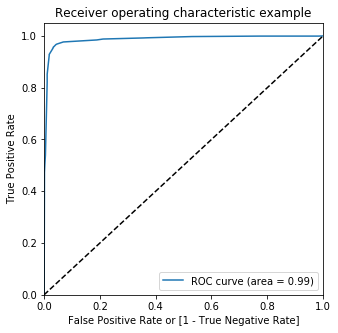

In [159]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

## Choosing optimal cut off point

In [160]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
5594,0,0.015262,5594,0,1,0,0,0,0,0,0,0,0,0
8073,1,0.991775,8073,1,1,1,1,1,1,1,1,1,1,1
7706,1,0.991775,7706,1,1,1,1,1,1,1,1,1,1,1
8857,0,0.002992,8857,0,1,0,0,0,0,0,0,0,0,0
5329,0,0.059048,5329,0,1,0,0,0,0,0,0,0,0,0


In [162]:
cutoff = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    ml1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total=sum(sum(ml1))
    accuracy = (ml1[0,0]+ml1[1,1])/total
    
    specificity = ml1[0,0]/(ml1[0,0]+ml1[0,1])
    sensitivity = ml1[1,1]/(ml1[1,0]+ml1[1,1])
    cutoff.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.447586     1.000000     0.000000
0.1          0.1  0.951454     0.976758     0.930951
0.2          0.2  0.961590     0.966627     0.957508
0.3          0.3  0.961590     0.966627     0.957508
0.4          0.4  0.962123     0.957092     0.966200
0.5          0.5  0.961056     0.951728     0.968614
0.6          0.6  0.961056     0.951728     0.968614
0.7          0.7  0.960790     0.949940     0.969580
0.8          0.8  0.957855     0.928486     0.981651
0.9          0.9  0.955988     0.924315     0.981651


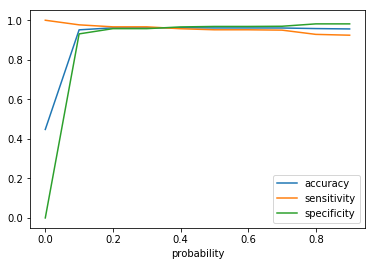

In [164]:
cutoff.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

## Choosing 0.3 as cut off rather than 0.2 sice 0.2 and 0.3 have almost all metrics same

In [166]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
5594,0,0.015262,5594,0,1,0,0,0,0,0,0,0,0,0,0
8073,1,0.991775,8073,1,1,1,1,1,1,1,1,1,1,1,1
7706,1,0.991775,7706,1,1,1,1,1,1,1,1,1,1,1,1
8857,0,0.002992,8857,0,1,0,0,0,0,0,0,0,0,0,0
5329,0,0.059048,5329,0,1,0,0,0,0,0,0,0,0,0,0


In [167]:
confusion_final = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion_final

array([[1983,   88],
       [  56, 1622]], dtype=int64)

In [169]:
TP = confusion_final[1,1] # true positive 
TN = confusion_final[0,0] # true negatives
FP = confusion_final[0,1] # false positives
FN = confusion_final[1,0] # false negatives

In [171]:
print('Accuracy: ', metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))
print('Sensitivity: ', TP / float(TP+FN))
print('Specificity: ', TN / float(TN+FP))
print('False positive rate: ', FP/ float(TN+FP))
print('Positive predictive value: ', TP / float(TP+FP))
print('Negative predictive value: ', TN / float(TN+FN))
print('Precision: ', TP / float(TP + FP))
print('Recall: ', TP / float(TP + FN))

Accuracy:  0.9610562816751134
Sensitivity:  0.966626936829559
Specificity:  0.957508450024143
False positive rate:  0.04249154997585707
Positive predictive value:  0.9485380116959065
Negative predictive value:  0.9725355566454145
Precision:  0.9485380116959065
Recall:  0.966626936829559


## Precision and Recall trade off

In [173]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(5594    0
 8073    1
 7706    1
 8857    0
 5329    0
 2099    0
 9044    1
 4270    0
 7342    1
 2967    1
 5204    0
 1231    0
 8816    1
 6174    0
 6232    0
 4631    0
 8591    1
 1917    0
 4167    0
 445     0
 2316    1
 2877    1
 6324    0
 152     0
 2239    1
 4864    0
 1382    0
 905     0
 5873    0
 1531    0
        ..
 8510    1
 4314    0
 6662    0
 6266    0
 7387    1
 5163    0
 7081    1
 4789    1
 1828    0
 8219    1
 5706    1
 8704    1
 4465    0
 3417    1
 4421    1
 2688    1
 5281    0
 2353    0
 3412    1
 5850    0
 2931    0
 7670    0
 5024    0
 8861    0
 1473    1
 7254    0
 3391    0
 643     1
 114     1
 6901    0
 Name: Converted, Length: 3749, dtype: int64, 5594    0
 8073    1
 7706    1
 8857    0
 5329    0
 2099    0
 9044    1
 4270    0
 7342    1
 2967    1
 5204    0
 1231    0
 8816    1
 6174    0
 6232    0
 4631    0
 8591    1
 1917    0
 4167    0
 445     0
 2316    1
 2877    1
 6324    0
 152     0
 2239    1
 4864    

In [175]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
x1, y1, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

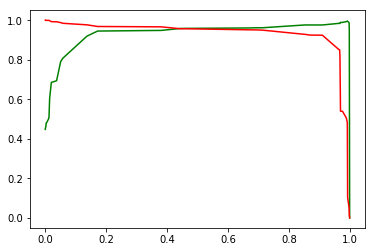

In [176]:
plt.plot(thresholds, x1[:-1], "g-")
plt.plot(thresholds, y1[:-1], "r-")
plt.show()

## Predictions on test Data

In [172]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test = X_test[col]
X_test.head()

,Last Notable Activity_Modified,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,Lead Profile_Student of SomeSchool,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off
983,1,0,0,0,0,1,0,0,0,0
6246,0,0,1,0,0,0,0,1,0,0
5616,0,0,0,0,0,0,0,0,1,0
2084,0,0,0,0,0,0,0,0,0,0
1468,0,0,0,0,0,0,0,0,1,0


In [177]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)
y_pred_1 = pd.DataFrame(y_test_pred)
y_test_df = pd.DataFrame(y_test)
y_test_df['LeadID'] = y_test_df.index
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conv_Prob'})
y_pred_final = y_pred_final[['LeadID','Converted','Conv_Prob']]
y_pred_final['final_predicted'] = y_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.4 else 0)
y_pred_final.head()

,LeadID,Converted,Conv_Prob,final_predicted
0,983,1,0.992700,1
1,6246,0,0.059048,0
2,5616,0,0.967511,1
3,2084,0,0.038007,0
4,1468,1,0.967511,1


In [178]:
confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion_test

array([[835,  34],
       [ 34, 705]], dtype=int64)

In [180]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [181]:
print('Accuracy: ', metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))
print('Sensitivity: ', TP / float(TP+FN))
print('Specificity: ', TN / float(TN+FP))
print('False positive rate: ', FP/ float(TN+FP))
print('Positive predictive value: ', TP / float(TP+FP))
print('Negative predictive value: ', TN / float(TN+FN))
print('Precision: ', TP / float(TP + FP))
print('Recall: ', TP / float(TP + FN))

Accuracy:  0.9577114427860697
Sensitivity:  0.9539918809201624
Specificity:  0.9608745684695051
False positive rate:  0.039125431530494824
Positive predictive value:  0.9539918809201624
Negative predictive value:  0.9608745684695051
Precision:  0.9539918809201624
Recall:  0.9539918809201624


# Conclusion

Last Activity, Last Notable Activity and Tags are the Top three variables in model which contribute most towards the probability of a lead getting converted

These are the Top 3 categorical/dummy variables in the model which should be focused the most on in order to increase the probability of lead conversion
    1.Tags Closed by Horizon
    2.Tags Lost to EIN S
    3.Tags Will revert after reading the mail

Concentrating more on the customers who are visiting the website and pages per view while visiting are more. Investing on customers who are active in searching and giving information.

